In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import random
import seaborn as sns
import scipy.stats as stats

dpi=400
default_hatch_patterns = ["o" , "x", "." , "*" , "." , "\\" , "O", ".", "*"]
default_color = "0.80"
default_box_width = 14
default_box_marker = "|"
default_box_marker_size = 20
default_box_marker_alpha = 0.8
default_grid_color = "0.8"
df = pd.read_csv("TYU07_corrigido.csv").drop('Unnamed: 0', axis=1)

# Parte 1 – Distribuição Amostral da Média

## Questão 1
Usando qualquer aplicativo que considere apropriado1 proceda a retirada de 1000 amostras aleatórias da variável Renda (primeiramente exclua as linhas com dados perdidos), com os seguintes tamanhos: 4, 16, 64 e 256 elementos. Com base nos resultados encontrados responda os itens a seguir:

In [2]:
sample4 = list()
sample16 = list()
sample64 = list()
sample256 = list()

# Garante que sempre serão gerados os mesmos números aleatórios
random.seed(4)

# Retira X elementos aleatoriamente da coluna Renda 1000 vezes
for i in range(1000):
    sample4.append(random.sample(df["Renda"].dropna().tolist(), 4))
    sample16.append(random.sample(df["Renda"].dropna().tolist(), 16))
    sample64.append(random.sample(df["Renda"].dropna().tolist(), 64))
    sample256.append(random.sample(df["Renda"].dropna().tolist(), 256))
    
# Salva os samples em um .csv com ajuda do pandas dataframe
pd.DataFrame([sample4, sample16, sample64, sample256], index=["4", "16", "64", "256"]).T.to_csv("Dados\Q1_samples.csv", encoding='utf-8', index=False)

### 1.a Pelo teorema central do limite admite-se que o valor esperado da média amostral seja a média populacional que se pretende estimar, e eles serão tão mais próximos à medida que aumenta o tamanho da amostra. Isso é confirmado pelos resultados obtidos nas amostras? JUSTIFIQUE.

In [3]:
mean4 = list()
mean16 = list()
mean64 = list()
mean256 = list()
# Como cada elemento das listas é composto por um conjunto de valores, é retirado a média de cada um desses conjuntos (há 1000)
for i in range(1000):
    mean4.append(np.mean(sample4[i]))
    mean16.append(np.mean(sample16[i]))
    mean64.append(np.mean(sample64[i]))
    mean256.append(np.mean(sample256[i]))
    
# Cria um dataframe com as seguintes colunas    
df1a = pd.DataFrame(columns=["Média amostral (N de sal. mín.)", "Erro em relação à população (%)"])

# Inclui as linhas no dataframe
df1a.loc["Média de amostragem de tamanho 4"] = np.array([np.mean(mean4), abs(100*(np.mean(mean4)-df["Renda"].mean())/df["Renda"].mean())])
df1a.loc["Média de amostragem de tamanho 16"] = np.array([np.mean(mean16), abs(100*(np.mean(mean16)-df["Renda"].mean())/df["Renda"].mean())])
df1a.loc["Média de amostragem de tamanho 64"] = np.array([np.mean(mean64), abs(100*(np.mean(mean64)-df["Renda"].mean())/df["Renda"].mean())])
df1a.loc["Média de amostragem de tamanho 256"] = np.array([np.mean(mean256), abs(100*(np.mean(mean256)-df["Renda"].mean())/df["Renda"].mean())])
df1a.loc["Média populacional"] = np.array([df["Renda"].mean(), 0])

# Arredonda e salva em formato CSV com os indices
df1a.round(3).to_csv("Dados\Q1a.csv", encoding='utf-8', index=True)

In [4]:
df1a

,Média amostral (N de sal. mín.),Erro em relação à população (%)
Média de amostragem de tamanho 4,1.756577,1.383804
Média de amostragem de tamanho 16,1.766255,0.840499
Média de amostragem de tamanho 64,1.788711,0.420228
Média de amostragem de tamanho 256,1.780115,0.062364
Média populacional,1.781226,0.000000


### 1.b) Além do que foi dito acima, admite-se que o desvio padrão das médias amostrais será igual ao desvio padrão populacional dividido pela raiz quadrada do tamanho da amostra, e eles serão tão mais próximos à medida que aumenta o tamanho da amostra. As amostras retiradas confirmam essa afirmação? JUSTIFIQUE.

In [5]:
df1b = pd.DataFrame(columns=["Desvio padrão amostral (N de sal. mín.)", "Desvio padrão amostral * sqrt(N)", "Erro (%)"])

df1b.loc["Desvio padrão de amostragem de tamanho 4"] = np.array([np.std(mean4),     np.std(mean4)*math.sqrt(4),     abs(100*(1 - np.std(mean4)  /(df["Renda"].std()/math.sqrt(4))))])
df1b.loc["Desvio padrão de amostragem de tamanho 16"] = np.array([np.std(mean16),   np.std(mean16)*math.sqrt(16),   abs(100*(1 - np.std(mean16) /(df["Renda"].std()/math.sqrt(16))))])
df1b.loc["Desvio padrão de amostragem de tamanho 64"] = np.array([np.std(mean64),   np.std(mean64)*math.sqrt(64),   abs(100*(1 - np.std(mean64) /(df["Renda"].std()/math.sqrt(64))))])
df1b.loc["Desvio padrão de amostragem de tamanho 256"] = np.array([np.std(mean256), np.std(mean256)*math.sqrt(256), abs(100*(1 - np.std(mean256)/(df["Renda"].std()/math.sqrt(256))))])
df1b.loc["Desvio padrão populacional"] = np.array([round(df["Renda"].std(),5)," -", 0])

# Arredonda e salva em formato CSV com os indices
df1b.round(3).to_csv("Dados\Q1b.csv", encoding='utf-8', index=True)

In [6]:
# df1b = pd.DataFrame(columns=["Desvio padrão amostral (N de sal. mín.)", "sigma/sqrt(N)", "Erro (%)"])

# df1b.loc["Desvio padrão de amostragem de tamanho 4"] = np.array([np.std(mean4),     df["Renda"].std()/math.sqrt(4),   abs(100*(1 - np.std(mean4)  /(df["Renda"].std()/math.sqrt(4))))])
# df1b.loc["Desvio padrão de amostragem de tamanho 16"] = np.array([np.std(mean16),   df["Renda"].std()/math.sqrt(16),  abs(100*(1 - np.std(mean16) /(df["Renda"].std()/math.sqrt(16))))])
# df1b.loc["Desvio padrão de amostragem de tamanho 64"] = np.array([np.std(mean64),   df["Renda"].std()/math.sqrt(64),  abs(100*(1 - np.std(mean64) /(df["Renda"].std()/math.sqrt(64))))])
# df1b.loc["Desvio padrão de amostragem de tamanho 256"] = np.array([np.std(mean256), df["Renda"].std()/math.sqrt(256), abs(100*(1 - np.std(mean256)/(df["Renda"].std()/math.sqrt(256))))])
# df1b.loc["Desvio padrão populacional"] = np.array([df["Renda"].std()," -", 0])

# # Arredonda e salva em formato CSV com os indices
# df1b.round(3).to_csv("Data\Q1b.csv", encoding='utf-8', index=True)

In [7]:
df1b

,Desvio padrão amostral (N de sal. mín.),Desvio padrão amostral * sqrt(N),Erro (%)
Desvio padrão de amostragem de tamanho 4,0.563131,1.12626,4.62364
Desvio padrão de amostragem de tamanho 16,0.286727,1.14691,2.87524
Desvio padrão de amostragem de tamanho 64,0.15222,1.21776,3.12498
Desvio padrão de amostragem de tamanho 256,0.071868,1.14989,2.62298
Desvio padrão populacional,1.18086,-,0


### c) Outra característica muito importante do teorema central do limite é que a distribuição amostral da média será cada vez mais próxima de uma distribuição normal, à medida que o tamanho da amostra aumenta, independentemente da forma da distribuição da variável na população. Sabe-se que a variável Renda não tem distribuição normal na população. Os resultados das amostras corroboram esta afirmação (usem os gráficos apropriados). JUSTIFIQUE.

In [8]:
df1c = pd.DataFrame(columns=["Assimetria", "Curtose"])
df1c.loc["Amostragem de tamanho 4"] = np.array([stats.skew(mean4), stats.kurtosis(mean4)])
df1c.loc["Amostragem de tamanho 16"] = np.array([stats.skew(mean16), stats.kurtosis(mean16)])
df1c.loc["Amostragem de tamanho 64"] = np.array([stats.skew(mean64), stats.kurtosis(mean64)])
df1c.loc["Amostragem de tamanho 256"] = np.array([stats.skew(mean256), stats.kurtosis(mean256)])

df1c.round(3).to_csv("Dados\Q1c.csv", encoding='utf-8', index=True)

In [9]:
df1c

,Assimetria,Curtose
Amostragem de tamanho 4,2.353254,12.979811
Amostragem de tamanho 16,1.410471,4.376954
Amostragem de tamanho 64,0.618119,0.574353
Amostragem de tamanho 256,0.206493,0.086011


Mesocúrtica: achatamento da curva normal, curtose = 0.
Se assimetria = 0, a distribuição é SIMÉTRICA.

In [10]:
# fig, ax = plt.subplots(figsize=(7,4))    
# ax.set(title="Relação entre tamanho de amostra e assimetria e curtose")
# df1c["Assimetria"].plot(ax=ax, kind="line", color='black', linestyle='--')
# df1c["Curtose"].plot(ax=ax, kind="line", color='black', linestyle='-')
# ax.grid(color=default_grid_color)
# ax.set_xticks(np.arange(4), ("Amostragem de tamanho 4", "Amostragem de tamanho 16", "Amostragem de tamanho 64", "Amostragem de tamanho 256"))


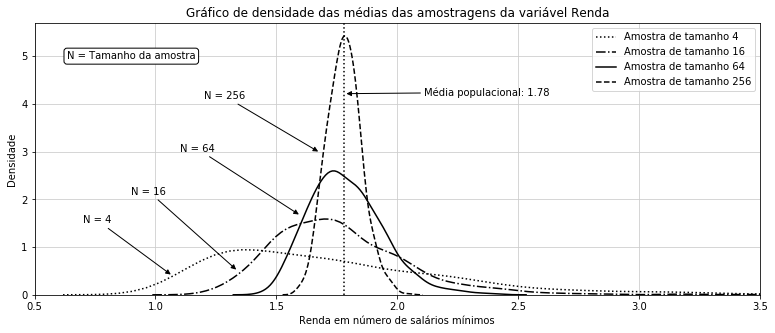

In [11]:
fig, ax = plt.subplots(figsize=(13,5))

sns.kdeplot(mean4,   ax=ax, color='black', linestyle=':')
sns.kdeplot(mean16,  ax=ax, color='black', linestyle='-.')
sns.kdeplot(mean64,  ax=ax, color='black', linestyle='-')
sns.kdeplot(mean256, ax=ax, color='black', linestyle='--')


ax.set(title="Gráfico de densidade das médias das amostragens da variável Renda", xlabel="Renda em número de salários mínimos", ylabel="Densidade")
ax.annotate('N = 4',   xy=(1.07, 0.40), xytext=(0.7, 1.5), arrowprops=dict(arrowstyle='-|>', fc='black'))
ax.annotate('N = 16',  xy=(1.34, 0.50), xytext=(0.9, 2.1), arrowprops=dict(arrowstyle='-|>', fc='black'))
ax.annotate('N = 64',  xy=(1.60, 1.66), xytext=(1.1, 3.0), arrowprops=dict(arrowstyle='-|>', fc='black'))
ax.annotate('N = 256', xy=(1.68, 2.98), xytext=(1.2, 4.1), arrowprops=dict(arrowstyle='-|>', fc='black'))

ax.legend(handles=ax.lines, labels=["Amostra de tamanho 4","Amostra de tamanho 16","Amostra de tamanho 64","Amostra de tamanho 256"])

ax.grid(color=default_grid_color)
ax.set_xbound((0.5,3.5))

# Insere linnha de média populacional
ax.axvline(x=df["Renda"].mean(), color='black', linestyle=':')

# Insere anotação sobre a linha de média
ax.annotate('Média populacional: {:0.2f}'.format(df["Renda"].mean()), xy=(df["Renda"].mean(), 0.74), xytext=(80, -2),
    xycoords=('data', 'axes fraction'), textcoords='offset points',
    arrowprops=dict(arrowstyle='-|>', fc='black'))

# Insere informação adicional
ax.text(0.9, 5, "N = Tamanho da amostra", va="center", ha="center",
        bbox=dict(boxstyle="round", alpha=1, fc='white'))

# Salva figura na pasta dedicada
plt.savefig('Dados\Q1c.png', bbox_inches='tight', dpi=dpi)

### 1.d) Obtenha os intervalos de 95% de confiança para as 1000 amostras de cada tamanho. Construa gráficos apropriados para mostrá-los. Analisando os gráficos, o que você pode concluir sobre a precisão dos intervalos à medida que aumenta o tamanho de amostra? JUSTIFIQUE.

Para 95% de confiança, zc = 1.96. Pelo teorema do limite central, para tamanhos de amostras superiores a 30 a distribuição das médias tende a ser normal. O nivel de conficanca c é o intervalo entre -zc e +zc. A area que sobra é de 1 - c, portanto, cada cauda tem area (1 - c)/2. A margem de erro é E = (zc * sd)/sqrt(n)

In [12]:
zc = 1.96
error4_95 = zc * np.std(mean4) / math.sqrt(4)
error16_95 = zc * np.std(mean16) / math.sqrt(16)
error64_95 = zc * np.std(mean64) / math.sqrt(64)
error256_95 = zc * np.std(mean256) / math.sqrt(256)
interval4_95 = [np.mean(mean4) - error4_95, np.mean(mean4), np.mean(mean4) + error4_95, error4_95]
interval16_95 = [np.mean(mean16) - error16_95, np.mean(mean16), np.mean(mean16) + error16_95, error16_95]
interval64_95 = [np.mean(mean64) - error64_95, np.mean(mean64), np.mean(mean64) + error64_95, error64_95]
interval256_95 = [np.mean(mean256) - error256_95, np.mean(mean256), np.mean(mean256) + error256_95, error256_95]
intervals_95 = [interval4_95, interval16_95, interval64_95, interval256_95]
# Cria dataframe com intervalos e erros
df1d = pd.DataFrame(intervals_95, columns=["Limite inferior", "Valor central", "Limite superior", "Erro"])

# Salva o dataframe
df1d.round(4).to_csv("Dados\Q1d.csv", encoding='utf-8', index=True)

df1d

,Limite inferior,Valor central,Limite superior,Erro
0,1.204709,1.756577,2.308446,0.551869
1,1.625759,1.766255,1.906751,0.140496
2,1.751417,1.788711,1.826005,0.037294
3,1.771312,1.780115,1.788919,0.008804


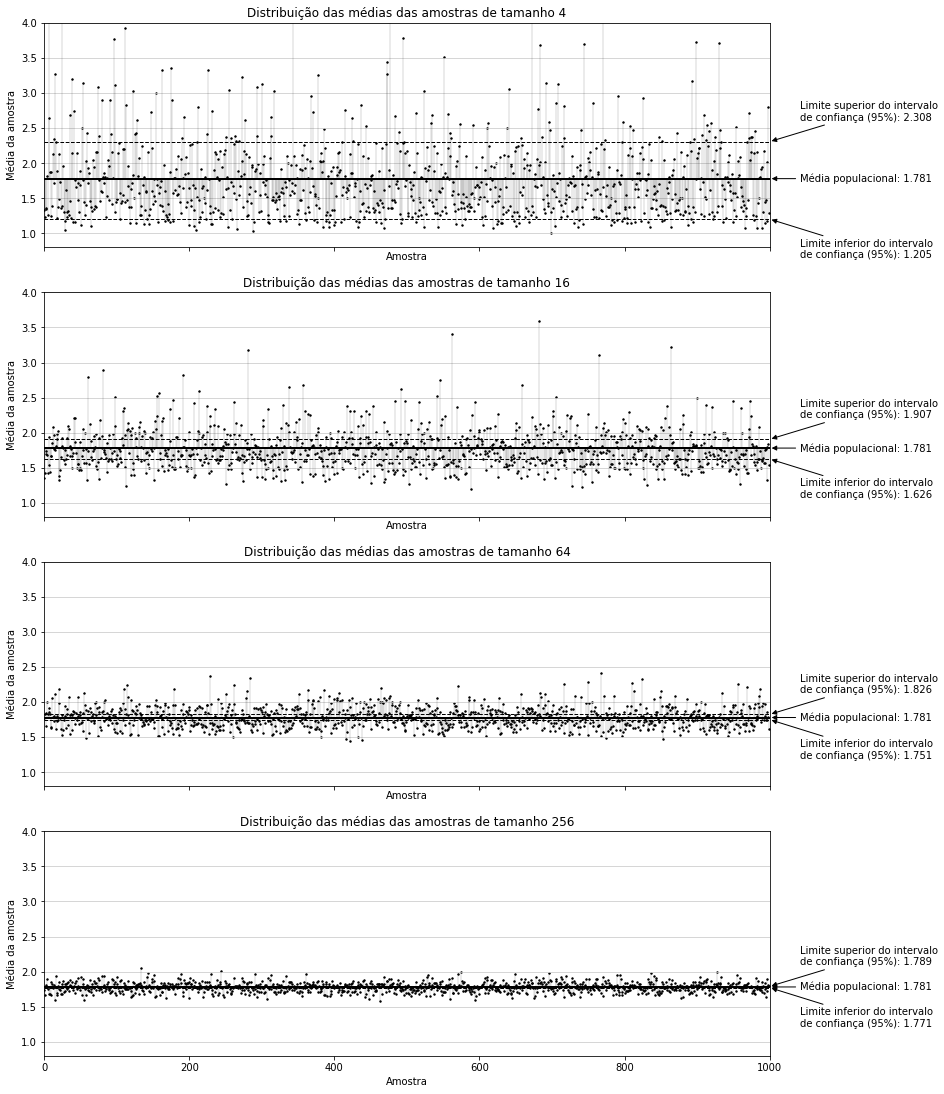

In [13]:
fig, ax = plt.subplots(nrows=4, ncols=1, sharex=True, sharey=True, figsize=(13, 19))

data = (mean4, mean16, mean64, mean256)

for i in range(0,4):
    ax[i].vlines(x=range(0,1000), ymin=df["Renda"].mean(), ymax=data[i], alpha=0.4, lw=0.4)
    ax[i].scatter(range(0,1000), data[i], s=2, color='black')

    ax[i].grid(axis="y", color=default_grid_color)
    ax[i].set_xbound((0,1000))
    ax[i].set_ybound((0.8, 4))
    ax[i].set(title="Distribuição das médias das amostras de tamanho" + " " + str(4**(1+i)), xlabel="Amostra", ylabel="Média da amostra")

    # Insere linnha de média populacional e limites de confiança
    ax[i].axhline(y=df["Renda"].mean(), color='black', linestyle='-', lw=2)
    ax[i].axhline(y=intervals_95[i][0], color='black', linestyle='--', lw=1)
    ax[i].axhline(y=intervals_95[i][2], color='black', linestyle='--', lw=1)

    # Insere anotação sobre a linha de média
    ax[i].annotate('Média populacional: {:0.3f}'.format(df["Renda"].mean()), xy=(1000, df["Renda"].mean()), xytext=(30, 0),
        verticalalignment='center', xycoords=('data', 'data'), textcoords='offset points',
        arrowprops=dict(arrowstyle='-|>', fc='black'))

    # Insere anotação sobre a linha
    ax[i].annotate('Limite inferior do intervalo\nde confiança (95%): {:0.3f}'.format(intervals_95[i][0]), xy=(1000, intervals_95[i][0]), xytext=(30, -30),
        verticalalignment='center', xycoords=('data', 'data'), textcoords='offset points',
        arrowprops=dict(arrowstyle='-|>', fc='black'))

    # Insere anotação sobre a linha
    ax[i].annotate('Limite superior do intervalo\nde confiança (95%): {:0.3f}'.format(intervals_95[i][2]), xy=(1000, intervals_95[i][2]), xytext=(30, 30),
        verticalalignment='center', xycoords=('data', 'data'), textcoords='offset points',
        arrowprops=dict(arrowstyle='-|>', fc='black'))

# Salva figura na pasta dedicada
plt.savefig('Dados\Q1d.png', bbox_inches='tight', dpi=dpi)